In [4]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [15]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [7]:
drop_column = ['DR_NO', 'Date Rptd','AREA', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',  'Rpt Dist No', 'Part 1-2', 
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'Mocodes' ]

df.drop(columns=drop_column, inplace=True)

In [8]:
df.columns

Index(['DATE OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc',
       'Vict Age', 'Vict Sex', 'LAT', 'LON'],
      dtype='object')

In [9]:
df['Crm Cd Desc'].value_counts()

Crm Cd Desc
VEHICLE - STOLEN                                           115186
BATTERY - SIMPLE ASSAULT                                    74816
BURGLARY FROM VEHICLE                                       63259
THEFT OF IDENTITY                                           62408
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     60956
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64

In [35]:
df['Crm Cd Desc'].unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'ARSON', 'BURGLARY',
       'PIMPING', 'PANDERING', 'OTHER MISCELLANEOUS CRIME',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'ROBBERY',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT OF IDENTITY', 'BATTERY - SIMPLE ASSAULT',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'BUNCO, GRAND THEFT',
       'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'TRESPASSING', 'VEHICLE - ATTEMPT STOLEN', 'RESISTING ARREST',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'BURGLARY FROM VEHICLE, ATTEMPTED',
       

In [34]:
df['AREA NAME'].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollenbeck',
       'Rampart', 'Newton', 'Northeast', '77th Street', 'Hollywood',
       'Harbor', 'West Valley', 'West LA', 'N Hollywood', 'Pacific',
       'Devonshire', 'Mission', 'Southeast', 'Olympic', 'Foothill',
       'Topanga'], dtype=object)

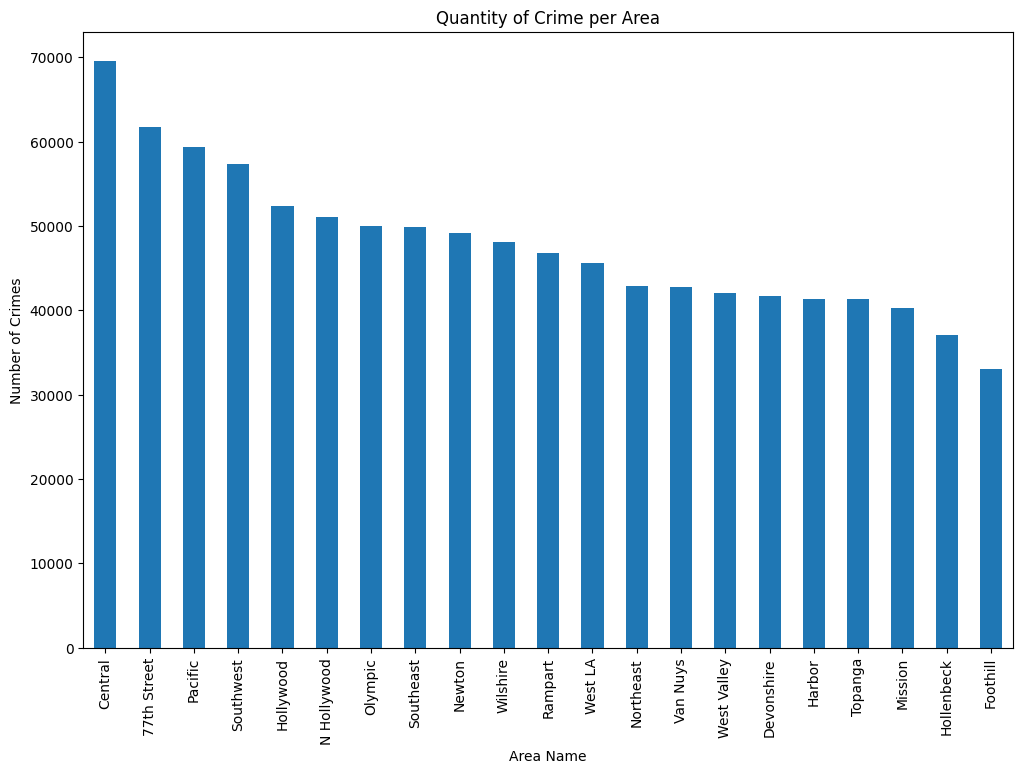

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

crime_per_area = df['AREA NAME'].value_counts()

plt.figure(figsize=(12, 8))
crime_per_area.plot(kind='bar')
plt.title('Quantity of Crime per Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

In [17]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['YearMonth'] = df['DATE OCC'].dt.to_period('M')
crime_trend = df['YearMonth'].value_counts().sort_index()

In [18]:
pivot_df = df.pivot_table(index='DATE OCC', columns=['AREA NAME', 'Crm Cd'], values='DR_NO', aggfunc='count', fill_value=0)
pivot_df = pivot_df.asfreq('D', method = 'bfill')
monthly_crime_sum = pivot_df.resample('M').sum()
monthly_crime_sum.asfreq('M')
monthly_crime_sum.head()

AREA NAME  77th Street                                       ... Wilshire      \
Crm Cd             110 113 121 122 210 220  230 231 235 236  ...      932 933   
DATE OCC                                                     ...                
2020-01-31           5   0   9   0  75  11  102   0   0  20  ...        0   0   
2020-02-29           1   0   5   4  92  12   85   2   0  31  ...        0   0   
2020-03-31           2   0   7   1  67   6   86   1   1  32  ...        1   0   
2020-04-30           5   0   5   0  48   8  109   3   2  37  ...        0   0   
2020-05-31           2   0   3   0  52   8  152   1   3  33  ...        0   0   

AREA NAME                                   
Crm Cd     940 943 944 946 949 950 951 956  
DATE OCC                                    
2020-01-31   2   0   0   9   0   0   1   9  
2020-02-29   2   0   0  12   0   1   0  10  
2020-03-31   1   0   0   7   0   0   0   6  
2020-04-30   0   0   0   5   0   0   0  10  
2020-05-31   1   0   0  11   0   1   0   8  

[5 rows x 2397 columns]

In [ ]:
df.isna().sum()

In [19]:
from sklearn.ensemble import RandomForestRegressor

def create_lagged_features(data, lags):
    lagged_data = pd.DataFrame({f'lag_{i}': data.shift(i) for i in range(1, lags + 1)})
    lagged_data['y'] = data
    return lagged_data.dropna()

predictions_list = []
lags = 12

for area in monthly_crime_sum.columns.levels[0]:
    for crime_type in monthly_crime_sum[area].columns:
        y = monthly_crime_sum[area][crime_type]
        lagged_data = create_lagged_features(y, lags)
        X_train = lagged_data.iloc[:-1, :-1]  
        y_train = lagged_data.iloc[:-1, -1]  
        
        model = RandomForestRegressor(random_state=123, n_jobs=-1, n_estimators=100)
        model.fit(X_train, y_train)
        
        last_lags = lagged_data.iloc[-1, :-1].values  
        for step in range(1, 13):
            next_pred = model.predict(last_lags.reshape(1, -1))[0]
            predictions_list.append({
                'Date': y.index[-1] + pd.DateOffset(months=step),
                'Area': area,
                'Crime_Type': crime_type,
                'Prediction': int(next_pred)
            })
            
           
            last_lags = np.roll(last_lags, -1)
            last_lags[-1] = next_pred

predictions = pd.DataFrame(predictions_list)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(data, area, crime_type, lags, model):
    
    y = data[area][crime_type]
    lagged_data = create_lagged_features(y, lags)
    
    # Split into train and test sets
    train_size = int(len(lagged_data) * 0.8)  # 80% train, 20% test
    train_data = lagged_data.iloc[:train_size]
    test_data = lagged_data.iloc[train_size:]
    
    # Separate features and targets
    X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
    X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Walk-forward validation
    predictions = []
    last_lags = X_test.iloc[0].values
    for actual in y_test:
        pred = model.predict(last_lags.reshape(1, -1))[0]
        predictions.append(pred)
        
        # Update lags
        last_lags = np.roll(last_lags, -1)
        last_lags[-1] = pred
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}


model = RandomForestRegressor(random_state=123, n_jobs=-1, n_estimators=100)
accuracy = evaluate_model(monthly_crime_sum, area='Central', crime_type=510, lags=12, model=model)
print(accuracy)


{'MAE': 11.457999999999998, 'RMSE': 17.697055687317025, 'MAPE': 16.327865925344994}


In [26]:
predictions.head(30)

,Date,Area,Crime_Type,Prediction
0,2025-01-31,77th Street,110,0
1,2025-02-28,77th Street,110,0
2,2025-03-31,77th Street,110,0
3,2025-04-30,77th Street,110,1
4,2025-05-31,77th Street,110,1
5,2025-06-30,77th Street,110,1
6,2025-07-31,77th Street,110,1
7,2025-08-31,77th Street,110,4
8,2025-09-30,77th Street,110,4
9,2025-10-31,77th Street,110,4


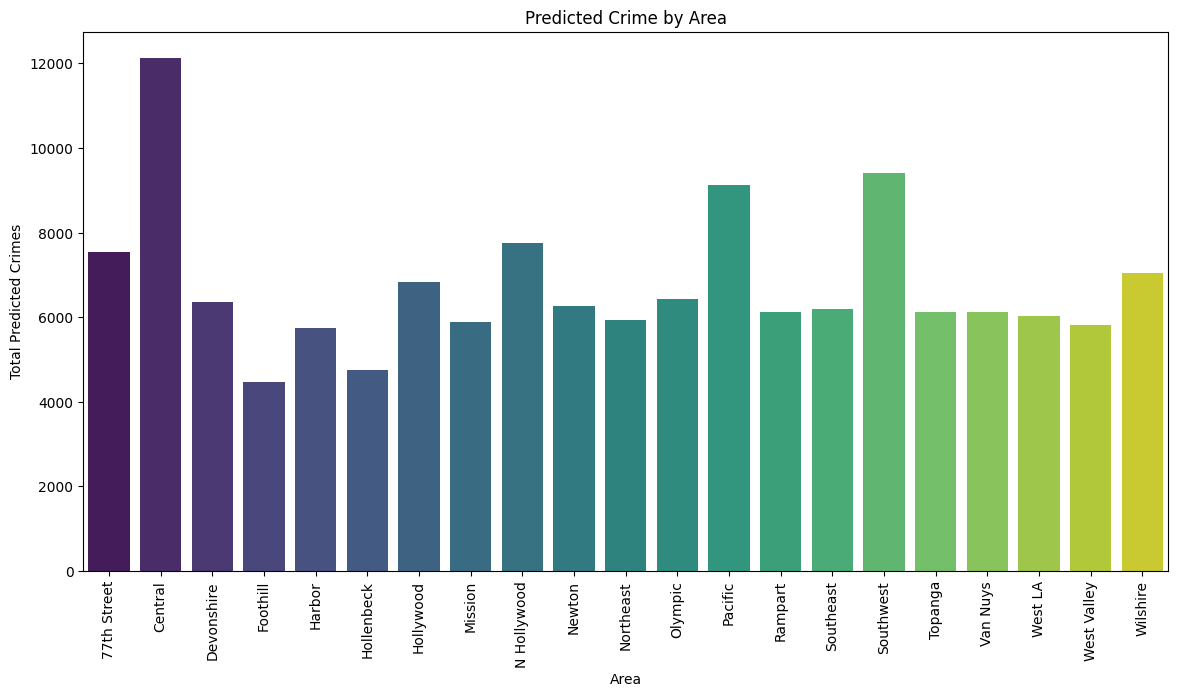

In [27]:
predictions_by_area = predictions.groupby('Area')['Prediction'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='Area', y='Prediction', data=predictions_by_area, palette='viridis')
plt.title('Predicted Crime by Area')
plt.xlabel('Area')
plt.ylabel('Total Predicted Crimes')
plt.xticks(rotation=90)
plt.show()

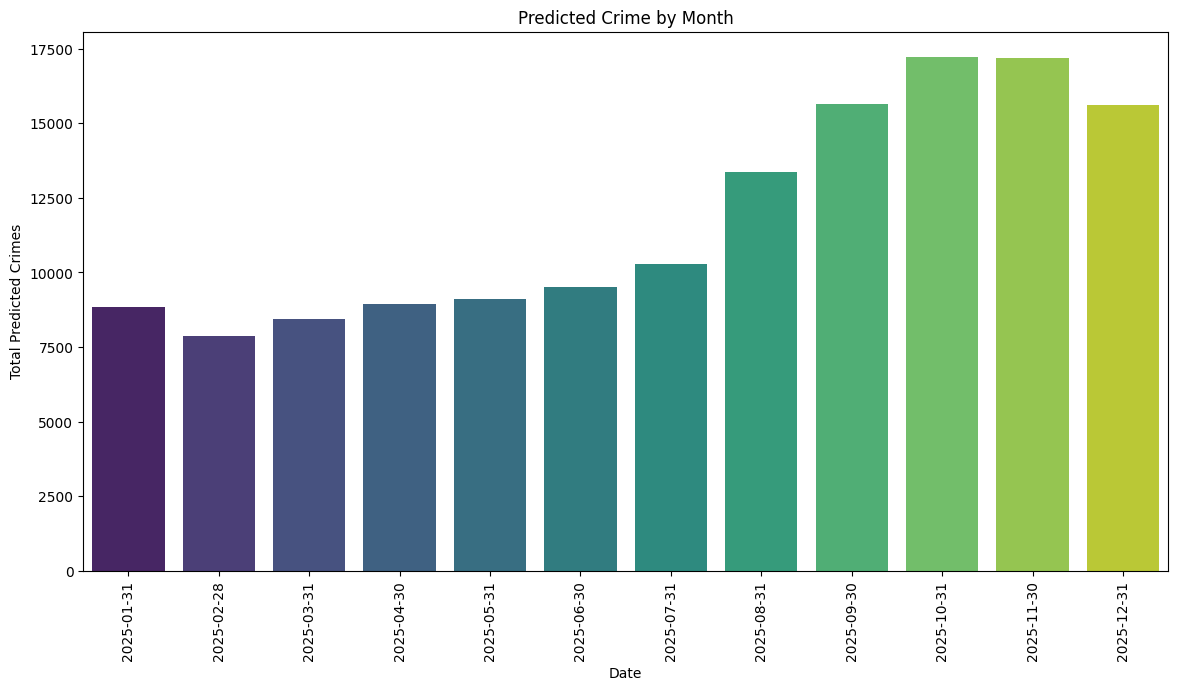

In [28]:
predictions_by_date = predictions.groupby('Date')['Prediction'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='Date', y='Prediction', data=predictions_by_date, palette='viridis')
plt.title('Predicted Crime by Month')
plt.xlabel('Date')
plt.ylabel('Total Predicted Crimes')
plt.xticks(rotation=90)
plt.show()

In [29]:
predictions_by_area_and_date = predictions.groupby(['Area', 'Date'])['Prediction'].sum().reset_index()
predictions_by_area_and_date.head()

,Area,Date,Prediction
0,77th Street,2025-01-31,409
1,77th Street,2025-02-28,356
2,77th Street,2025-03-31,382
3,77th Street,2025-04-30,428
4,77th Street,2025-05-31,413


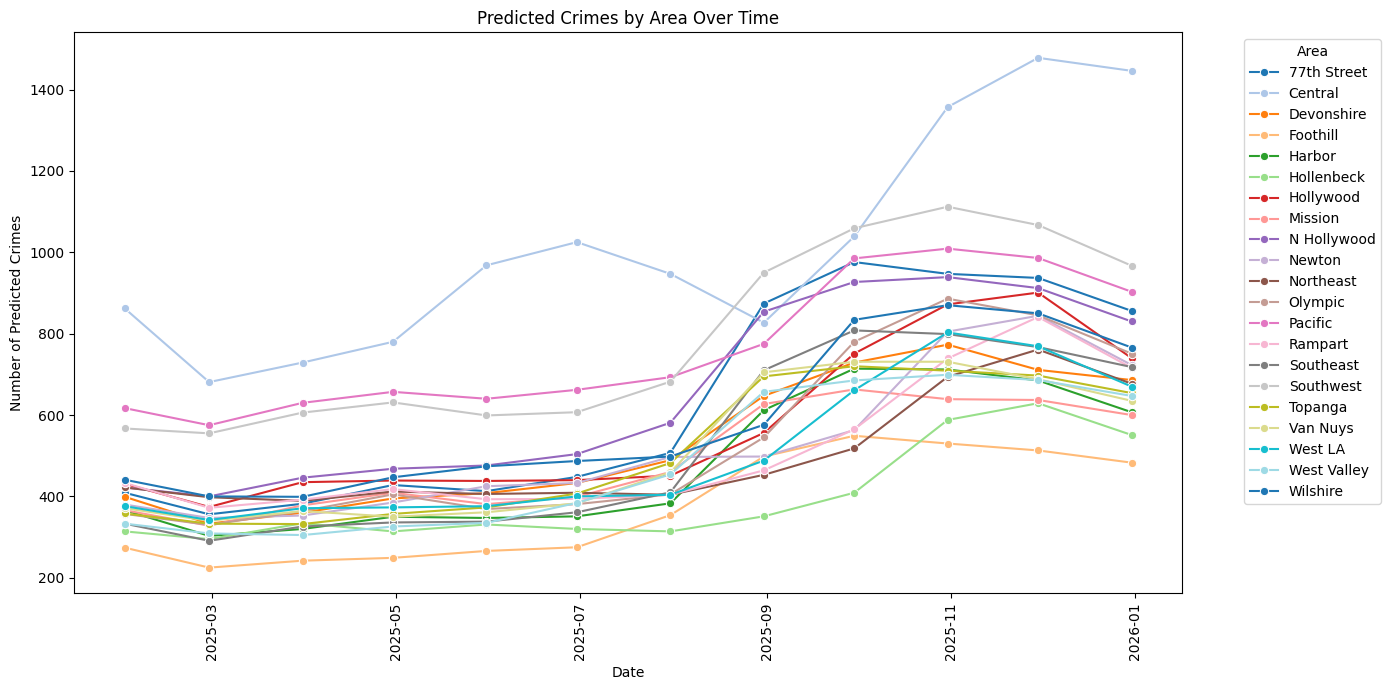

In [30]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=predictions_by_area_and_date, x='Date', y='Prediction', hue='Area', palette='tab20', marker='o')
plt.title('Predicted Crimes by Area Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Predicted Crimes')
plt.xticks(rotation=90)
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
import pickle
with open("predictions.pkl", "wb") as file:
    pickle.dump(predictions, file)

